# Working example of the CBR module for TA

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import matplotlib.pyplot as plt
import pathlib as p

In [2]:
## enter your path to the package
## Other option is to make whole virtual environment to install the package.
sys.path.append('C:\\Users\\David Palecek\\Documents\\Python_projects\\AnalysisCBR\\cbr_analysis_v0\\')
from analysis import *

## If you want to be able to instatiate Trs() class and use its functions.
# from analysis.experiments import trs

I am running __init__
running support.py
running iccd init
running ta init


## Loading data

In [3]:
# For example
folder = p.Path('C:/Users/David Palecek/Documents/Python_projects/AnalysisCBR/' \
                'cbr_analysis_v0/analysis/data/UF_data')
file = 'sol-f889_ma_540nm_5uW_MA_POL_Pump_H_POL_Probe.wtf'

In [4]:
d = Ta(folder.joinpath(file))

folder C:\Users\David Palecek\Documents\Python_projects\AnalysisCBR\cbr_analysis_v0\analysis\data\UF_data\Figs exists.
ignoring first timeslice when importing 
correct version of analysis.


In [5]:
# OR
file = p.Path('C:/Users/David Palecek/Documents/Python_projects/AnalysisCBR/' \
                'cbr_analysis_v0/analysis/data/UF_data/' \
              'sol-f889_ma_540nm_5uW_MA_POL_Pump_H_POL_Probe.wtf')

In [6]:
d = Ta(file)

folder C:\Users\David Palecek\Documents\Python_projects\AnalysisCBR\cbr_analysis_v0\analysis\data\UF_data\Figs exists.
ignoring first timeslice when importing 
correct version of analysis.


In [7]:
## list all the available methods for TA data
[method_name for method_name in dir(d)
 if callable(getattr(d, method_name)) and method_name[0] != '_']

['SVD',
 'SVDfit',
 'calc_chirp',
 'calc_kin',
 'calc_spe',
 'comp_sweep_kin',
 'correct_chirp',
 'create_save_path',
 'cut_t',
 'cut_wl',
 'fastlab_import',
 'fit_chirp',
 'fit_ode',
 'fit_single_kin',
 'invert_sweeps',
 'load_chirp',
 'load_data',
 'load_project',
 'new_average',
 'plot_2d',
 'plot_fit',
 'plot_kin',
 'plot_spe',
 'recalc',
 'rem_bg',
 'rem_region',
 'reset_def_vals',
 'reset_ta',
 'save_chirp',
 'save_fig',
 'save_project',
 'set_t0',
 'uberfast_import']

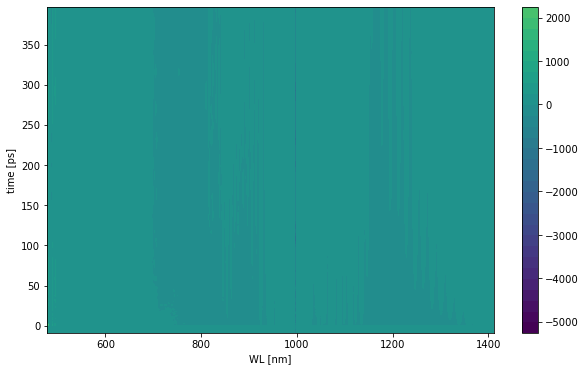

In [8]:
## TODO ##
## PLOT 2D plot of the data
d.plot_2d()

running recalc.


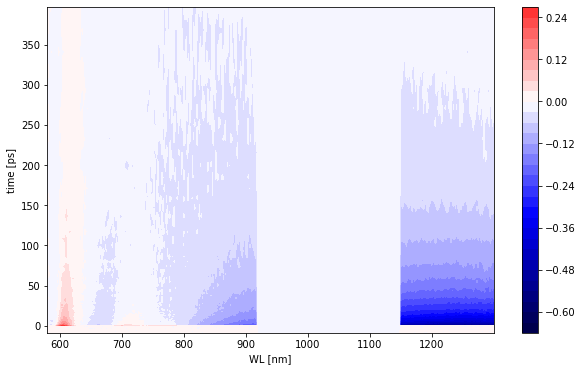

In [9]:
d.cut_wl(580,1300)  # in time axis use .cut_t() 
d.rem_region(920,1150)
d.rem_bg(-3)
d.plot_2d(cmap='seismic')

Only first WL range used.


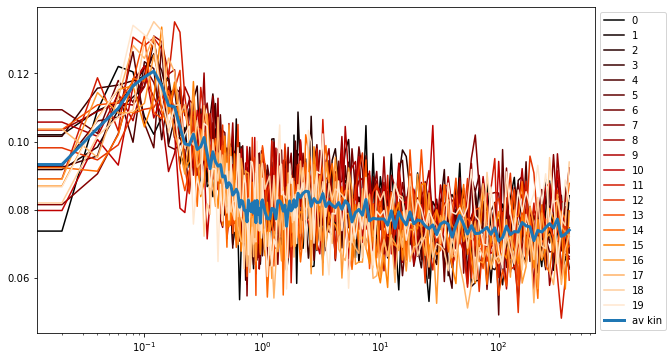

In [10]:
## Compare sweeps (always shows raw data, limited to single range)
## plus demonstration of different ways how to plot figures
d.comp_sweep_kin([600,700, 650,700], xscale='log')

In [11]:
f=d.comp_sweep_kin([600,700])  # f is a figure object which can be edited

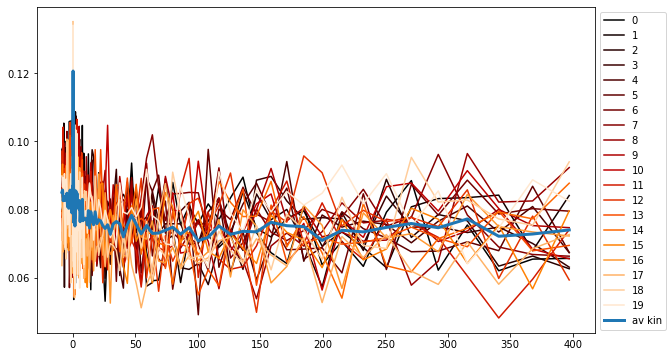

In [12]:
f

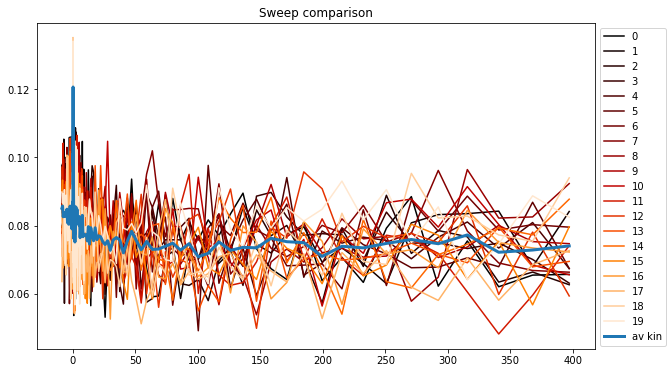

In [13]:
f.axes[0].set_title('Sweep comparison')
f

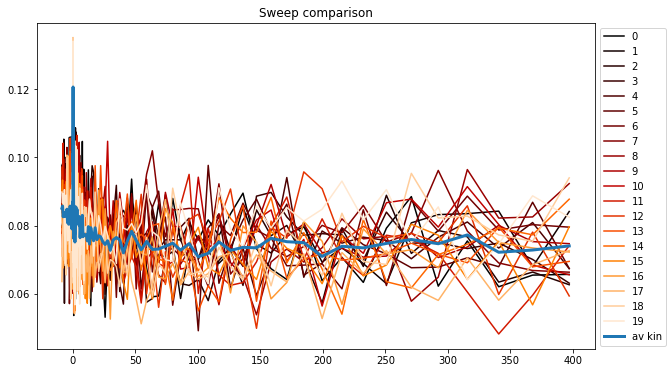

In [14]:
d.figure

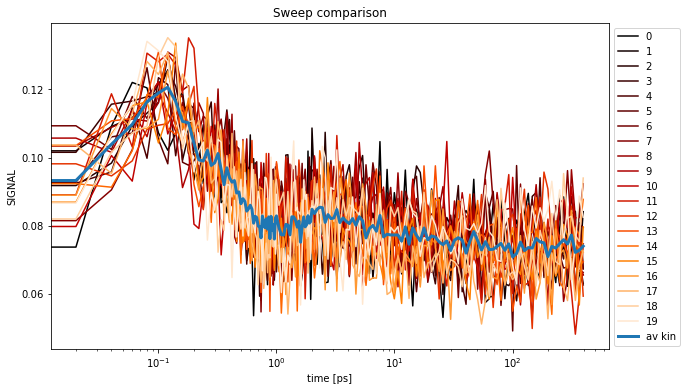

In [15]:
d.figure.axes[0].set_xlabel('time [ps]')
d.figure.axes[0].set_ylabel('SIGNAL')
d.figure.axes[0].set_xscale('log')
d.figure

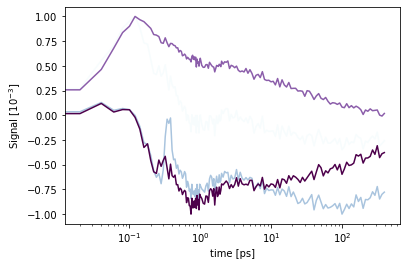

In [16]:
d.calc_kin([600,700, 650,750, 600,650, 650,700])
d.calc_spe([1,2, 2,5, 5,10, 50,100])
d.plot_kin(xscale='log', norm='abs', cmap='BuPu')

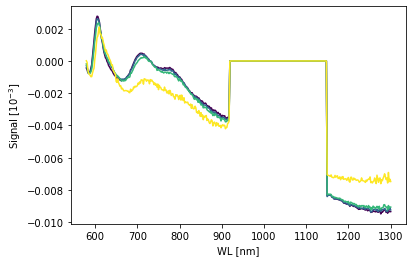

In [17]:
d.plot_spe(norm='area', cmap='viridis')

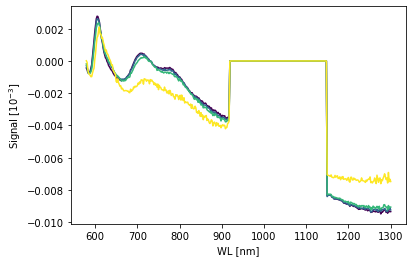

In [18]:
d.figure  ## last plot always in d.figure attribute

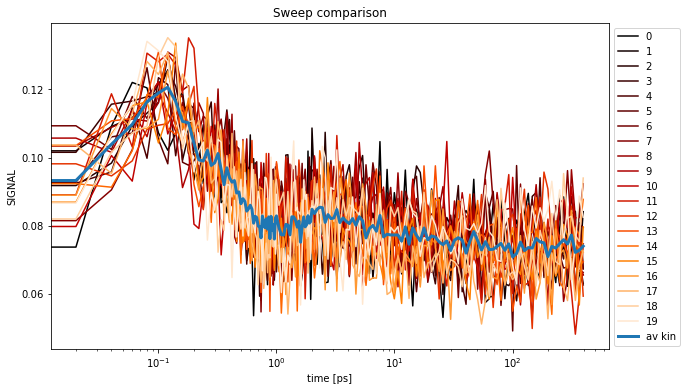

In [19]:
f  ## f is still f

## Inclusion and inversion of sweep if something went wrong with the experiment

In [20]:
# since d.kin is not empty any more, inversion of sweeps will automatically recalculate the kin/spe objects.
# Does not recalculate all commands like rem_bg, which you might have run.
d.invert_sweeps([1,1,1,1,1, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0])

running recalc.
Calling <function Trs.calc_kin at 0x00000227A79180D8> because data changed
Calling <function Trs.calc_spe at 0x00000227A7918048> because data changed
running recalc.
Calling <function Trs.calc_kin at 0x00000227A79180D8> because data changed
Calling <function Trs.calc_spe at 0x00000227A7918048> because data changed


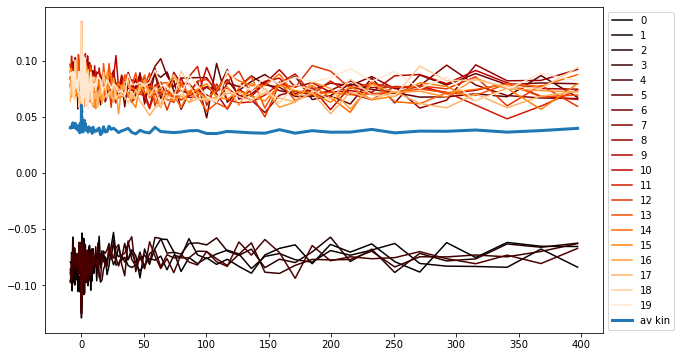

In [21]:
d.comp_sweep_kin([600,700])

running recalc.
Calling <function Trs.calc_kin at 0x00000227A79180D8> because data changed
Calling <function Trs.calc_spe at 0x00000227A7918048> because data changed


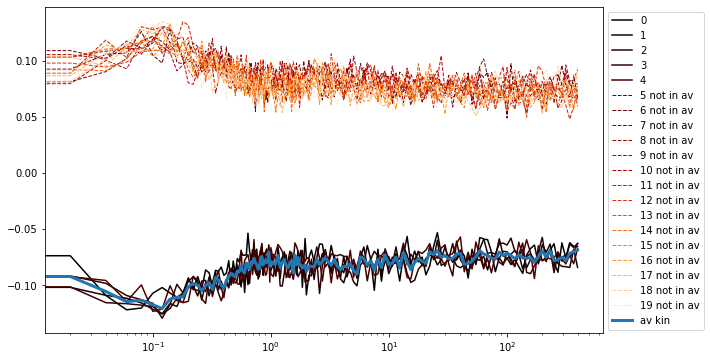

In [22]:
# include only the first five
d.new_average([1,1,1,1,1, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0])
d.comp_sweep_kin([600,700], xscale='log')

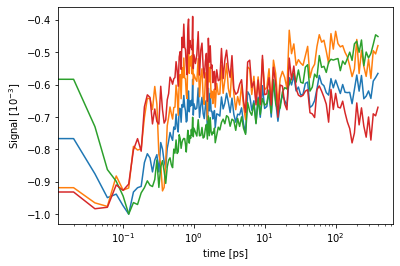

In [23]:
# so now kinetics noisier and inverted.
d.plot_kin(xscale='log', norm='abs')

In [24]:
## Back to all sweeps
d.invert_sweeps([1,1,1,1,1, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0])
d.new_average([1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1])


running recalc.
Calling <function Trs.calc_kin at 0x00000227A79180D8> because data changed
Calling <function Trs.calc_spe at 0x00000227A7918048> because data changed
running recalc.
Calling <function Trs.calc_kin at 0x00000227A79180D8> because data changed
Calling <function Trs.calc_spe at 0x00000227A7918048> because data changed
running recalc.
Calling <function Trs.calc_kin at 0x00000227A79180D8> because data changed
Calling <function Trs.calc_spe at 0x00000227A7918048> because data changed


In [25]:
d.cut_wl(580,1300)  # in time axis use .cut_t() 
d.rem_region(920,1150)
d.rem_bg(-3)

running recalc.
Calling <function Trs.calc_kin at 0x00000227A79180D8> because data changed
Calling <function Trs.calc_spe at 0x00000227A7918048> because data changed


In [26]:
d.calc_kin([600,700, 650,750, 600,650, 650,700])
d.calc_spe([1,2, 2,5, 5,10, 50,100])

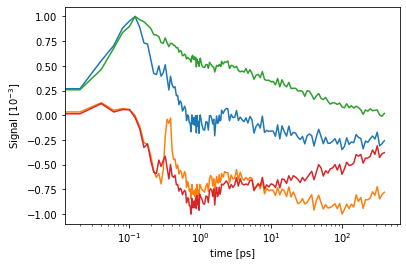

In [27]:
d.plot_kin(xscale='log', norm='abs')

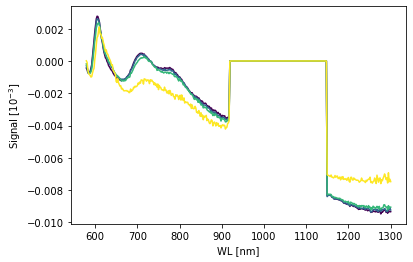

In [28]:
d.plot_spe(norm='area', cmap='viridis')

## Chirp correction

In [29]:
# %matplotlib qt
# d.calc_chirp()

In [30]:
# %matplotlib inline

In [31]:
# d.fit_chirp()

In [32]:
# d.correct_chirp()

In [33]:
# d.chirp
# d.save_chirp()

In [34]:
d.load_chirp()

chirp loaded to C:\Users\David Palecek\Documents\Python_projects\AnalysisCBR\cbr_analysis_v0\analysis\data\UF_data\Figs\chirp.txt


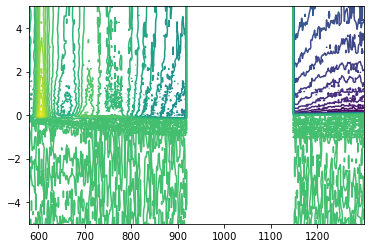

In [35]:
d.correct_chirp()

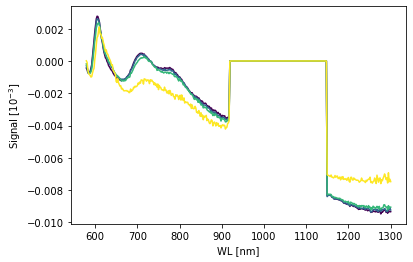

In [36]:
d.plot_spe(norm='area', cmap='viridis')

In [37]:
## move t0, check the total accumulated t0 shift in d.t0 variable
d.set_t0(0)

running recalc.
Calling <function Trs.calc_kin at 0x00000227A79180D8> because data changed
Calling <function Trs.calc_spe at 0x00000227A7918048> because data changed


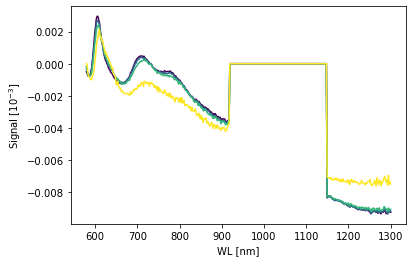

In [38]:
d.plot_spe(norm='area', cmap='viridis')

In [39]:
# automatic save path for the figures, can be changed directly in d.save_path or
# define as a parameter in loading data with Ta(dir_save='')
d.save_path

PureWindowsPath('C:/Users/David Palecek/Documents/Python_projects/AnalysisCBR/cbr_analysis_v0/analysis/data/UF_data/Figs')

In [40]:
# recalculates kin and spectra after making operations on the d.data variable
d.recalc()

running recalc.
Calling <function Trs.calc_kin at 0x00000227A79180D8> because data changed
Calling <function Trs.calc_spe at 0x00000227A7918048> because data changed


In [41]:
## saving d.figure into d.save_path as a image and pickle
## from pickle, figure can be reloaded and changed again.
d.save_fig()

In [42]:
## save project as a dictionary into a pickle file
d.save_project()

In [43]:
## reset default values
d.reset_def_vals()

resetting all the values
ignoring first timeslice when importing 


In [44]:
## everything lost
d.plot_kin()

ValueError: No defined kinetics yet.

In [45]:
## reload project from the pickle
data = Ta()
data.save_path


correct version of analysis.


In [46]:
data.load_project(path='C:/Users/David Palecek/Documents/Python_projects/AnalysisCBR/cbr_analysis_v0/analysis/data/UF_data/Figs')

project loaded from: C:\Users\David Palecek\Documents\Python_projects\AnalysisCBR\cbr_analysis_v0\analysis\data\UF_data\Figs\project.pkl


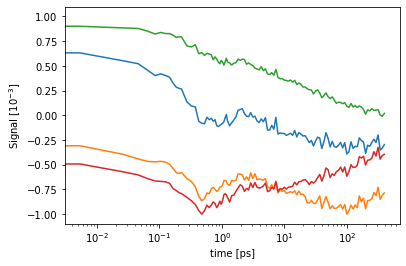

In [47]:
data.plot_kin(xscale='log', norm='abs')

## Fitting single kinetics

None


You need to specify range(s) as list: 600,700


number of datasets: 1.


C:\Users\David Palecek\Documents\Python_projects\AnalysisCBR\cbr_analysis_v0\analysis\modules\fitting.py:103: RuntimeWarning: overflow encountered in square
  return np.sqrt((y - exp_model(p, *params))**2)
C:\Users\David Palecek\Documents\Python_projects\AnalysisCBR\cbr_analysis_v0\analysis\modules\fitting.py:84: RuntimeWarning: overflow encountered in exp
  for k in range(n)],


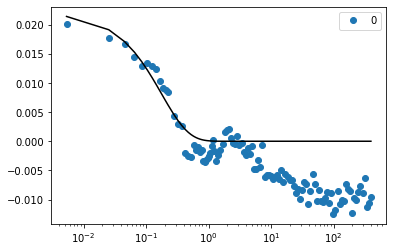

In [48]:
data.kin = None
fit0 = data.fit_single_kin()

[550, 600, 700, 800, 800, 900]
number of datasets: 3.


C:\Users\David Palecek\Documents\Python_projects\AnalysisCBR\cbr_analysis_v0\analysis\modules\fitting.py:84: RuntimeWarning: overflow encountered in exp
  for k in range(n)],
C:\Users\David Palecek\Documents\Python_projects\AnalysisCBR\cbr_analysis_v0\analysis\modules\fitting.py:103: RuntimeWarning: overflow encountered in square
  return np.sqrt((y - exp_model(p, *params))**2)


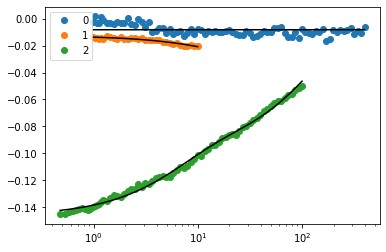

In [49]:
fit1 = data.fit_single_kin(nexp=2,rng=[550,600, 700,800, 800,900],t_lims=(1,1e6, 1,10, 0.5,100))

In [50]:
#parameters of the first fit
fit1[0].x

array([-1.31798150e+00,  4.98634243e-05, -8.19202099e-03,  2.26467327e+05])

[550, 600, 700, 800, 800, 900]
number of datasets: 3.
Using default init_par


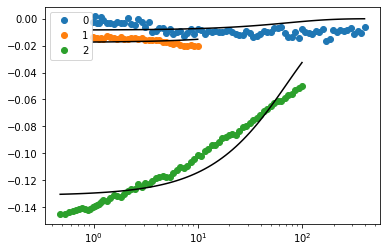

In [51]:
## two exp fit of kinetics with lifetimes as global parameters
fit2 = data.fit_single_kin(nexp=2,rng=[550,600, 700,800, 800,900],t_lims=(1,1e6, 1,10, 0.5,100),
                        glob=(0,1,0,1))

In [52]:
## first 4 (component one): three independent amplitudes + 1 global lifetime
## second 4 (component two): three independent amplitudes + 1 global lifetime
fit2.x

array([-4.21304380e-03, -8.78401414e-03, -6.57112452e-02,  7.13793186e+01,
       -1.38292782e+00,  8.93504919e-02, -1.41906713e+00,  1.59125604e+01])

[550, 600, 700, 800, 800, 900]
number of datasets: 3.
Using default init_par


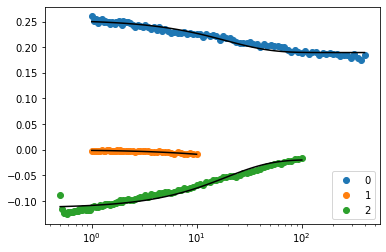

In [53]:
## adding constant to the exponential model
fit3 = d.fit_single_kin(nexp=2,rng=[550,600, 700,800, 800,900],t_lims=(1,1e6, 1,10, 0.5,100),
                        glob=(0,1,0,1,0),
                        const=True)

In [54]:
# last parameter is the constant
fit3.x

array([ 3.17792651e-02,  1.04481095e-02, -4.69270729e-02,  1.88684636e+01,
        3.70711618e+04,  3.26973565e+03,  2.00077868e+04,  7.14714567e+01,
        1.89497226e-01, -2.11619119e-02, -1.95760393e-02])

## Fit kin to ODE

number of datasets: 3.
((7008.279512542423,), (0.3759379382631458,))
[((448282.11409887346,), (-0.0030975144932716392,)), ((1343835.8946798975,), (-0.019862098060498507,)), ((95.16303913502553,), (-0.13289593487699883,))]
res 0 is 0.01176588553831122
res 1 is 0.0052085527483151685
res 2 is 0.025311767439102167


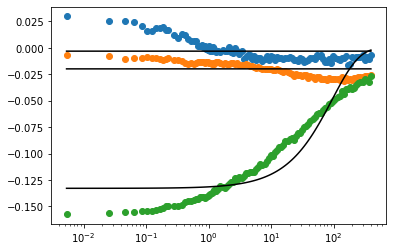

In [55]:
fit4 = data.fit_ode('one_state', tol=1e-4, xscale='log')

number of datasets: 3.
((1202.146952598303, 9504.711696698756, 1571.3686813583095), (-0.8749306355430004, 0.6940333620116979))
takes too long, try again.
[((25.546667845116392, 1.027694475410764, 93345252.30236778), (0.8267797946768769, -0.8043687564001591)), ((860.6763638220328, 32.570997503244676, 2607.101620156554), (0.778134595556239, -0.791248666948762)), ((630.3653012934166, 2645.125625733902, 223785.62323889852), (-0.30952043201041474, 0.18672085753179782))]
res 0 is 0.0007868397334362465
res 1 is 0.0003453797359114973
res 2 is 0.05486766865813207


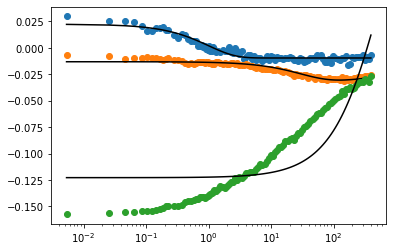

In [56]:
## this can take a while, if initial parameters not provided
fit5 = data.fit_ode('two_states_transfer', tol=4e-2, xscale='log')

## SVD

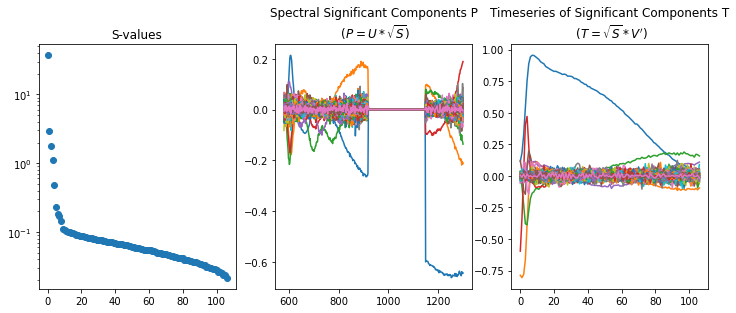

In [59]:
data.SVD()

In [60]:
## Victor in Charge here.
data.SVDfit()

Not implemented yet - please supply function


## Some extra which is not implemented on the Ta() class level
### but some parts are in the fitting module

In [59]:
## fit ODE to the whole 2D map
import numpy as np
from analysis.modules import fitting as ft
fot_2d = ft.fit_ode_2d(data.t, data.data, 'two_states_transfer', p0_amp=(1,1), 
                       p0_ode=tuple([10000*np.random.random() for i in range(3)]))

1
2
3
4
5
6
7
8
9
10


In [85]:
idx = 80
kin0, kin1 = ft.ode_solution(fot_2d[0], 'two_states_transfer',
                             (data.t[idx], data.t[-1]), (1,0.5), data.t[idx:]).y
comp0 = np.outer(kin0, fot_2d[1][:,0])
comp1 = np.outer(kin1, fot_2d[1][:,1])

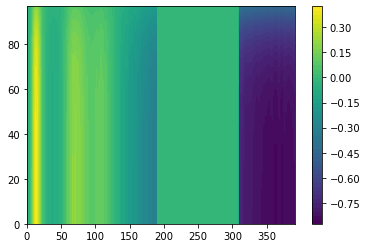

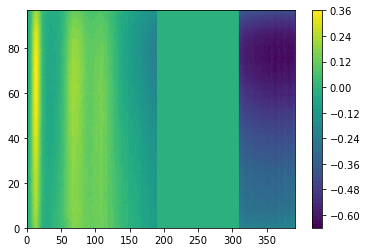

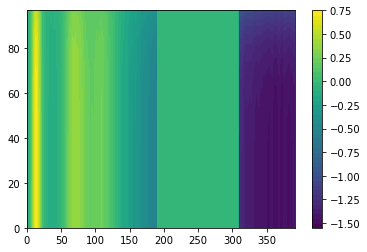

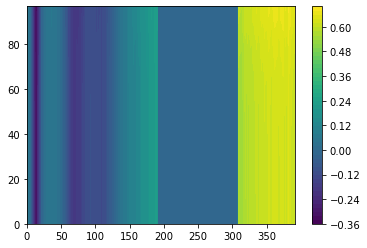

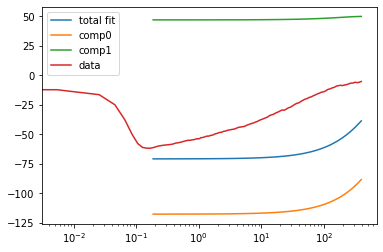

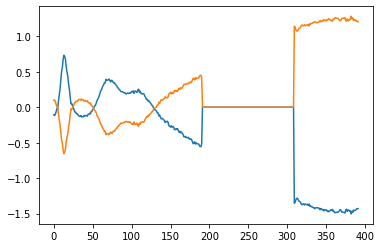

In [86]:
plt.contourf(comp0+comp1,51)
plt.colorbar()
plt.show()

plt.contourf(comp0+comp1 - data.data[idx:, :],51)
plt.colorbar()
plt.show()

plt.contourf(comp0,51)
plt.colorbar()
plt.show()

plt.contourf(comp1,51)
plt.colorbar()
plt.show()

plt.plot(data.t[idx:], np.sum(comp0+comp1, axis=1), label='total fit')
plt.plot(data.t[idx:], np.sum(comp0, axis=1), label='comp0')
plt.plot(data.t[idx:], np.sum(comp1, axis=1), label='comp1')
plt.plot(data.t, np.sum(data.data, axis=1), label='data')
plt.legend()
plt.xscale('log')
plt.show()

plt.plot(fot_2d[1][:,0])
plt.plot(fot_2d[1][:,1])
plt.show()

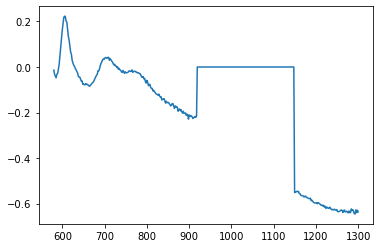

In [84]:
plt.plot(data.wl, data.data[idx,:])